In [1]:
# --- Celda 1: Instalación ---
!pip install osmnx networkx matplotlib

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 33.3 MB/s  0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------- ----------- 7.9/11.0 MB 38.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 35.7 MB/s  0:00:00
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ---------------- ----------------------- 7.9/19.2 MB 39.3 MB/s eta 0:00:01
   --------------------------------- ------ 16.0/19.2 MB 40.1 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 33.4 MB/s  0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 38.5 MB/s  0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 36.6 MB/s  0:00:00

   ----------------------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# --- Celda 2: Importación ---
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Configuramos osmnx para que funcione correctamente en notebooks
ox.settings.log_console=True
ox.settings.use_cache=True

In [4]:
# --- Celda 3: Descarga del Grafo ---

# Define el lugar que quieres descargar. Puedes usar un nombre de barrio, ciudad o una dirección.
lugar = "Plaza Castilla, Madrid, Spain"

distancia_radio = 1000

# Esta función busca el punto central de "lugar" y descarga todas las calles
# dentro del radio (dist) que le hemos especificado.

print(f"Descargando el grafo de calles para un radio de {distancia_radio}m alrededor de: {lugar}...")
G = ox.graph_from_address(lugar, dist=distancia_radio, network_type='drive')

print("¡Grafo creado con éxito!")

Descargando el grafo de calles para un radio de 1000m alrededor de: Plaza Castilla, Madrid, Spain...
¡Grafo creado con éxito!


Mostrando el mapa de calles (grafo) de Malasaña.


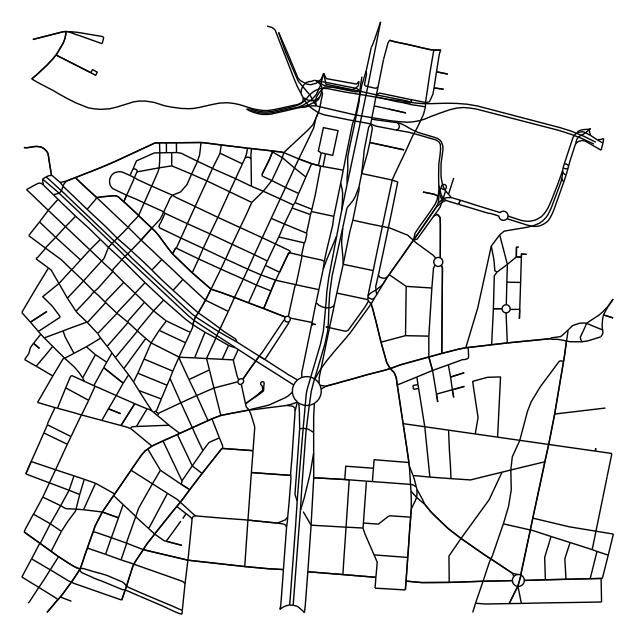

In [5]:
# --- Celda 4: Visualización Básica ---

# Dibuja el grafo.

fig, ax = ox.plot_graph(G, show=False, close=False, bgcolor='#FFFFFF', edge_color='k', node_size=0)
print("Mostrando el mapa de calles (grafo) de Malasaña.")
plt.show()

Calculando la ruta más corta con Dijkstra...
¡Ruta encontrada!


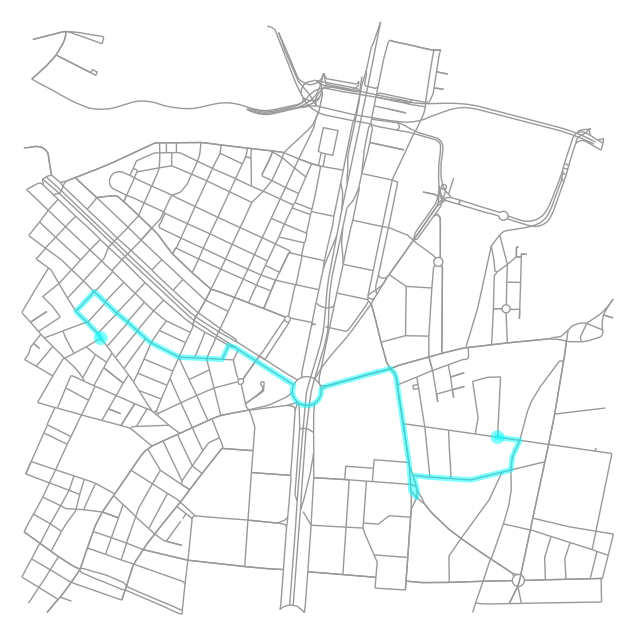

Mostrando la ruta óptima calculada.


In [7]:
# --- Celda 5: Cálculo de Ruta con Dijkstra ---

# NetworkX necesita un nodo de inicio y un nodo final.
# Vamos a coger dos nodos aleatorios del grafo para este ejemplo. -> En el futuro habría que definirlos
import random
nodos = list(G.nodes)
origen = random.choice(nodos)
destino = random.choice(nodos)

# 'weight'='length' le dice a Dijkstra que encuentre la ruta con la menor DISTANCIA.
print("Calculando la ruta más corta con Dijkstra...")
ruta = nx.dijkstra_path(G, origen, destino, weight='length')

print("¡Ruta encontrada!")

# Visualiza el grafo y la ruta que ha calculado Dijkstra
fig, ax = ox.plot_graph_route(G, ruta, route_color='cyan', route_linewidth=4,
                              orig_dest_size=100, ax=None, node_size=0,
                              edge_color='#999999', edge_linewidth=1,
                              bgcolor='#FFFFFF')

print("Mostrando la ruta óptima calculada.")
plt.show()